# Phillies Offseason 2024

# Run Functions

In [4]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [6]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as skl
import subprocess
import duckdb as db # Yegor tells me about duckdb, this will allow me to use SQL in the context of python
# claude AI, I don't remember what this was

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


In [7]:
# Well, where to start? The Phillies were very successful for most of 2024 but failed at the end.

# Statcast Maxes

## Longest Hit

In [10]:
# Longest HR - Trea Turner off of Max Fried I believe.
# Yes Trea Turner's bomb off of Max Fried on July 5th was the longest home run of the season.

In [11]:
po24 = pos[pos.game_year == 2024]
po24[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc']
].sort_values(by='hit_distance_sc',ascending=False).head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc
215410,2024-07-05,"Turner, Trea",6,ATL,PHI,home_run,108.4,29.0,459.0
208438,2024-08-31,"Sosa, Edmundo",3,PHI,ATL,home_run,107.6,28.0,450.0
207130,2024-09-09,"Schwarber, Kyle",6,PHI,TB,home_run,113.3,25.0,447.0
220658,2024-05-24,"Castellanos, Nick",5,COL,PHI,home_run,108.1,30.0,445.0
218755,2024-06-11,"Schwarber, Kyle",1,BOS,PHI,home_run,112.4,31.0,444.0
217798,2024-06-17,"Schwarber, Kyle",3,PHI,SD,home_run,108.1,33.0,441.0
219816,2024-05-31,"Sosa, Edmundo",2,PHI,STL,home_run,110.0,29.0,439.0
215825,2024-07-02,"Turner, Trea",5,CHC,PHI,home_run,107.3,27.0,439.0
207120,2024-09-10,"Schwarber, Kyle",1,PHI,TB,home_run,113.9,23.0,437.0
205920,2024-09-19,"Turner, Trea",3,NYM,PHI,home_run,106.6,27.0,436.0


## Hardest Hit

In [13]:
# Kyle Schwarber opened the postseason by uncorking a bomb off of Kodai Senga. It was the hardest hit ball all year.
# Schwarber had the 10 hardest hit balls by Phillie in 2024.

In [14]:
po24[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc']
].sort_values(by='launch_speed',ascending=False).head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc
204613,2024-10-05,"Schwarber, Kyle",1,PHI,NYM,home_run,115.8,27.0,425.0
215035,2024-07-09,"Schwarber, Kyle",2,PHI,LAD,single,115.6,9.0,165.0
209336,2024-08-25,"Schwarber, Kyle",1,KC,PHI,NaN,115.4,14.0,257.0
226694,2024-04-10,"Schwarber, Kyle",8,STL,PHI,single,115.2,7.0,129.0
226941,2024-04-09,"Schwarber, Kyle",1,STL,PHI,NaN,115.1,10.0,223.0
207790,2024-09-05,"Schwarber, Kyle",3,MIA,PHI,double,115.1,16.0,278.0
212099,2024-08-04,"Schwarber, Kyle",1,SEA,PHI,home_run,114.9,23.0,428.0
216689,2024-06-26,"Schwarber, Kyle",8,DET,PHI,NaN,114.8,26.0,409.0
221529,2024-05-17,"Schwarber, Kyle",4,PHI,WSH,NaN,114.6,11.0,253.0
228088,2024-03-31,"Schwarber, Kyle",1,PHI,ATL,home_run,114.4,19.0,382.0


## Fastest Pitch

In [16]:
# On the first day of the season, Jose Alvarado threw a 101 mph fastball. He had the second hardest pitch too.

In [17]:
pp24 = pps[pps.game_year == 2024]
pp24[['game_date','player_name','inning','home_team','away_team'
     ,'events','type','pitch_type'
     ,'release_speed','release_spin_rate'
     ]].sort_values(by='release_speed',ascending=False).head(10)

,game_date,player_name,inning,home_team,away_team,events,type,pitch_type,release_speed,release_spin_rate
227172,2024-03-29,"Alvarado, José",8,PHI,ATL,NaN,S,SI,101.0,2205.0
203352,2024-10-08,"Alvarado, José",7,NYM,PHI,NaN,B,SI,100.8,2187.0
226959,2024-03-30,"Soto, Gregory",8,PHI,ATL,NaN,S,SI,100.8,2201.0
227161,2024-03-29,"Alvarado, José",8,PHI,ATL,single,X,SI,100.5,2228.0
227115,2024-03-29,"Alvarado, José",8,PHI,ATL,NaN,B,SI,100.5,2232.0
211407,2024-08-03,"Alvarado, José",8,SEA,PHI,NaN,S,SI,100.5,1954.0
225038,2024-04-13,"Soto, Gregory",7,PHI,PIT,NaN,S,SI,100.5,2220.0
203235,2024-10-09,"Estévez, Carlos",6,NYM,PHI,NaN,B,FF,100.3,2295.0
203361,2024-10-08,"Alvarado, José",7,NYM,PHI,NaN,B,SI,100.3,2222.0
213302,2024-07-19,"Alvarado, José",9,PIT,PHI,NaN,S,SI,100.2,2110.0


In [18]:
df = pps[pps.release_speed >= 100]
df.groupby('game_year'
           ,as_index=False).agg({'des' : 'count'
                                 ,'pitcher' : 'nunique'
                                })

,game_year,des,pitcher
0,2015,21,2
1,2018,7,2
2,2019,1,1
3,2021,229,3
4,2022,273,2
5,2023,96,4
6,2024,24,3


In [19]:
df.groupby('player_name',as_index=False).agg({'des' : 'count'})

,player_name,des
0,"Alvarado, José",538
1,"Coonrod, Sam",13
2,"Diekman, Jake",1
3,"Domínguez, Seranthony",38
4,"Estévez, Carlos",3
5,"García, Luis",1
6,"Giles, Ken",20
7,"Marte, Yunior",1
8,"Soto, Gregory",35
9,"Wheeler, Zack",1


In [20]:
# concat_mp4s_in_folder('Fastest Pitch Thrown by Each Phillies Pitcher in 2024')

In [21]:
folder = 'Fastest Pitch Thrown by Each Phillies Pitcher in 2024'
folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)
mp4_files = [file for file in os.listdir(folder_path) if file.endswith(".mp4")]
cwd = os.getcwd()
os.chdir(folder_path)
mp4_files = glob.glob('*normalized*.mp4')
os.chdir(cwd)
mp4_files

['anormalized_ff1.mp4',
 'bnormalized_ff2.mp4',
 'cnormalized_ff3.mp4',
 'dnormalized_ff4.mp4',
 'enormalized_ff5.mp4',
 'fnormalized_ff6.mp4',
 'gnormalized_ff7.mp4',
 'hnormalized_ff8.mp4',
 'inormalized_ff9.mp4',
 'jnormalized_ff10.mp4',
 'knormalized_ff11.mp4',
 'lnormalized_ff12.mp4',
 'mnormalized_ff13.mp4',
 'nnormalized_ff14.mp4',
 'onormalized_ff15.mp4',
 'pnormalized_ff16.mp4',
 'qnormalized_ff17.mp4',
 'rnormalized_ff18.mp4',
 'snormalized_ff19.mp4',
 'tnormalized_ff20.mp4',
 'unormalized_ff21.mp4',
 'vnormalized_ff22.mp4',
 'wnormalized_ff23.mp4',
 'xnormalized_ff24.mp4',
 'ynormalized_ff25.mp4',
 'znormalized_ff26.mp4',
 'zzanormalized_ff27.mp4',
 'zzbnormalized_ff28.mp4',
 'zzcnormalized_ff29.mp4',
 'zzdnormalized_ff30.mp4',
 'zzenormalized_ff31.mp4',
 'zzfnormalized_ff32.mp4',
 'zzgnormalized_ff33.mp4',
 'zzhnormalized_ff34.mp4']

In [22]:
# folder = 'Fastest Pitch Thrown by Each Phillies Pitcher in 2024'
# # Normalize frame rates for all MP4 files
# folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)
# mp4_files = [file for file in os.listdir(folder_path) if file.endswith(".mp4")]

# for file in mp4_files:
#     input_path = os.path.join(folder_path, file)
#     output_path = os.path.join(folder_path, f"normalized_{file}")
#     command = [
#         "ffmpeg", "-i", input_path, "-r", "30", "-vf", "fps=30", "-c:v", "libx264",
#         "-preset", "fast", "-crf", "23", "-c:a", "aac", output_path
#     ]
#     subprocess.run(command)
#     #print('File normalized')

# print("All files normalized.")

# folder = 'Fastest Pitch Thrown by Each Phillies Pitcher in 2024'
# folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)
# # Now I am going to concatenate all the normalized videos
# from moviepy.editor import VideoFileClip, concatenate_videoclips

# # Step 1: Specify the folder containing MP4 files
# folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)

# # Step 2: Get a sorted list of MP4 files in the folder
# # mp4_files = sorted([file for file in os.listdir(folder_path) if file.endswith(".mp4")])
# cwd = os.getcwd()
# os.chdir(folder_path)
# mp4_files = glob.glob('*normalized*.mp4')
# os.chdir(cwd)

# # Step 3: Load all MP4 files as video clips
# clips = [VideoFileClip(os.path.join(folder_path, file)) for file in mp4_files]

# # Step 4: Concatenate the clips
# final_clip = concatenate_videoclips(clips, method="compose")
# final_clip = final_clip.set_fps(30)

# # Step 5: Write the output file
# output_path = os.path.join(folder_path, "{}.mp4".format(folder))  # Replace with desired output path
# final_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")

# print(f"Video successfully created: {output_path}")

### Fastest Pitch by Pitcher for a Video

In [ ]:
# an24 = an[an.game_year == 2024]
# an24.groupby('pitch_type',as_index=False).agg({'release_speed' : 'max'}).sort_values(by='release_speed',ascending=False)

In [ ]:
# rs24 = pp24[pp24.player_name == 'Suárez, Ranger']
# rs24.groupby('pitch_type',as_index=False).agg({'release_speed' : 'max'}).sort_values(by='release_speed',ascending=False)

In [151]:
pp24.groupby(['player_name'],as_index=False).agg({'release_speed' : 'max'}).sort_values(by='release_speed',ascending=False)

,player_name,release_speed
1,"Alvarado, José",101.0
20,"Soto, Gregory",100.8
6,"Estévez, Carlos",100.3
5,"Domínguez, Seranthony",99.9
10,"Kerkering, Orion",99.7
27,"Wheeler, Zack",99.0
12,"Marte, Yunior",98.9
8,"Hoffman, Jeff",98.7
19,"Ruiz, José",98.4
24,"Sánchez, Cristopher",98.3


## Slowest K

In [153]:
# Kolby Allard threw some awfully slow curveballs. So did Ranger Suarez but it worked.

In [154]:
pp24.groupby('events',as_index=False).agg({'des' : 'count'})
ks = pp24[pp24.events.isin(['strikeout_double_play','strikeout'])]
ks[['game_date','player_name','inning','home_team','away_team'
     ,'events','type','pitch_type'
     ,'release_speed','release_spin_rate'
     ]].sort_values(by='release_speed').head(10)

,game_date,player_name,inning,home_team,away_team,events,type,pitch_type,release_speed,release_spin_rate
205799,2024-09-14,"Allard, Kolby",3,PHI,NYM,strikeout,S,CU,70.6,1927.0
205143,2024-09-19,"Allard, Kolby",6,NYM,PHI,strikeout,S,CU,70.8,1881.0
208455,2024-08-25,"Allard, Kolby",4,KC,PHI,strikeout,S,CU,71.0,1755.0
204489,2024-09-24,"Allard, Kolby",4,PHI,CHC,strikeout,S,CU,71.0,1725.0
211323,2024-08-03,"Allard, Kolby",5,SEA,PHI,strikeout,S,CU,72.2,1832.0
213730,2024-07-12,"Suárez, Ranger",5,PHI,OAK,strikeout,S,CU,72.3,2040.0
221548,2024-05-10,"Suárez, Ranger",6,MIA,PHI,strikeout,S,CU,72.9,2121.0
223871,2024-04-22,"Suárez, Ranger",3,CIN,PHI,strikeout,S,CU,73.0,2182.0
220155,2024-05-21,"Suárez, Ranger",2,PHI,TEX,strikeout,S,CU,73.1,2164.0
208648,2024-08-24,"Suárez, Ranger",2,KC,PHI,strikeout,S,CU,73.4,2206.0


## Highest Spin Rate

In [156]:
# Well it should be Orion Kerkering, he spins his slider most consistently but Tyler Gilbert actually did him better!

In [157]:
pp24[['game_date','player_name','inning','home_team','away_team'
     ,'events','type','pitch_type'
     ,'release_speed','release_spin_rate'
     ]].sort_values(by='release_spin_rate',ascending=False).head(10)

,game_date,player_name,inning,home_team,away_team,events,type,pitch_type,release_speed,release_spin_rate
208866,2024-08-23,"Gilbert, Tyler",4,KC,PHI,NaN,S,ST,84.8,3189.0
208690,2024-08-24,"Kerkering, Orion",6,KC,PHI,NaN,B,ST,88.8,3128.0
208389,2024-08-26,"Kerkering, Orion",7,PHI,HOU,NaN,B,ST,87.1,3120.0
222047,2024-05-06,"Kerkering, Orion",9,PHI,SF,NaN,S,ST,86.3,3119.0
224273,2024-04-19,"Kerkering, Orion",9,PHI,CWS,NaN,S,ST,87.4,3100.0
208412,2024-08-26,"Kerkering, Orion",7,PHI,HOU,NaN,S,ST,86.6,3098.0
207530,2024-09-01,"Kerkering, Orion",7,PHI,ATL,NaN,B,ST,87.8,3088.0
214085,2024-07-10,"Kerkering, Orion",7,PHI,LAD,strikeout,S,ST,87.3,3085.0
223404,2024-04-25,"Kerkering, Orion",8,CIN,PHI,NaN,B,ST,86.8,3084.0
224259,2024-04-19,"Kerkering, Orion",9,PHI,CWS,field_out,X,ST,86.8,3083.0


In [158]:
# That is kinda crazy tbh.

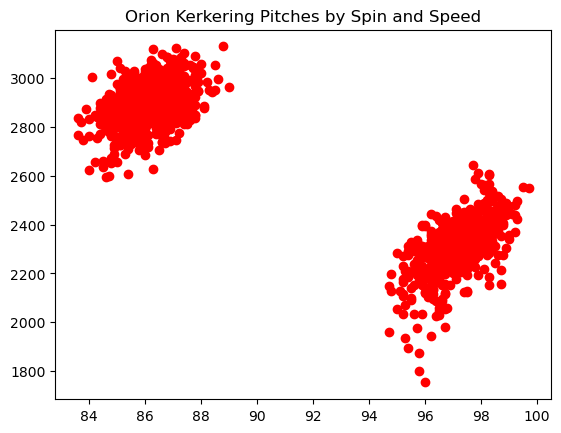

In [159]:
ok = pp24[pp24.player_name == 'Kerkering, Orion']
#ok['color'] = ok.pitch_type.map(pitch_type_colors)
plt.scatter(ok.release_speed,ok.release_spin_rate, c = '#ff0000')
plt.title('Orion Kerkering Pitches by Spin and Speed')
plt.show()

In [160]:
# to be honest, I don't care that much. This is a good one.

## Fastest Pitch Hit for a HR

In [162]:
# Harper's homer off of Severino in NLDS G2

In [163]:
hrs = po24[po24.events == 'home_run']
hrs[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc'
     ,'pitch_type','p_throws','release_speed','release_spin_rate'
    ]
].sort_values(by='release_speed',ascending=False).head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc,pitch_type,p_throws,release_speed,release_spin_rate
204313,2024-10-06,"Harper, Bryce",6,PHI,NYM,home_run,111.8,28.0,431.0,FF,R,99.0,2395.0
207037,2024-09-10,"Turner, Trea",3,PHI,TB,home_run,101.8,35.0,381.0,FF,R,98.7,2377.0
212817,2024-07-29,"Marsh, Brandon",4,PHI,NYY,home_run,108.6,33.0,409.0,FF,R,98.7,2564.0
221487,2024-05-18,"Clemens, Kody",9,PHI,WSH,home_run,106.6,23.0,413.0,FF,R,98.2,2140.0
214035,2024-07-20,"Harper, Bryce",9,PIT,PHI,home_run,108.7,32.0,428.0,FF,R,98.1,2452.0
212099,2024-08-04,"Schwarber, Kyle",1,SEA,PHI,home_run,114.9,23.0,428.0,FF,R,97.8,1994.0
205246,2024-09-24,"Schwarber, Kyle",8,PHI,CHC,home_run,107.1,25.0,400.0,FF,R,97.7,2565.0
222273,2024-05-13,"Stott, Bryson",9,NYM,PHI,home_run,103.6,24.0,387.0,FF,R,97.1,2434.0
211622,2024-08-07,"Schwarber, Kyle",1,LAD,PHI,home_run,102.8,34.0,378.0,SI,R,97.1,2157.0
221072,2024-05-22,"Sosa, Edmundo",4,PHI,TEX,home_run,104.5,26.0,382.0,SI,R,97.0,2154.0


## Highest Spin Hit for a HR

In [165]:
hrs[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc'
     ,'pitch_type','p_throws','release_speed','release_spin_rate'
    ]
].sort_values(by='release_spin_rate',ascending=False).head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc,pitch_type,p_throws,release_speed,release_spin_rate
217798,2024-06-17,"Schwarber, Kyle",3,PHI,SD,home_run,108.1,33.0,441.0,ST,R,82.0,3091.0
212666,2024-07-30,"Hays, Austin",2,PHI,NYY,home_run,99.5,44.0,351.0,ST,R,82.6,2889.0
208646,2024-08-29,"Marsh, Brandon",6,PHI,ATL,home_run,100.7,38.0,382.0,CU,R,83.1,2882.0
224518,2024-04-26,"Castellanos, Nick",3,SD,PHI,home_run,99.1,31.0,398.0,ST,R,81.1,2830.0
217839,2024-06-17,"Schwarber, Kyle",6,PHI,SD,home_run,102.6,25.0,412.0,SL,L,85.9,2821.0
224533,2024-04-26,"Harper, Bryce",3,SD,PHI,home_run,106.6,33.0,396.0,ST,R,81.4,2815.0
215588,2024-07-04,"Castellanos, Nick",4,CHC,PHI,home_run,108.4,25.0,407.0,ST,R,81.3,2785.0
205828,2024-09-20,"Bohm, Alec",4,NYM,PHI,home_run,98.6,30.0,383.0,ST,R,79.5,2748.0
214540,2024-07-13,"Harper, Bryce",7,PHI,OAK,home_run,101.0,29.0,378.0,FF,R,93.1,2746.0
208630,2024-08-30,"Realmuto, J.T.",7,PHI,ATL,home_run,106.8,22.0,385.0,CU,R,83.2,2741.0


## Shortest Home Run

In [167]:
hrs[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc'
     ,'pitch_type','p_throws','release_speed','release_spin_rate'
    ]
].sort_values(by='hit_distance_sc').head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc,pitch_type,p_throws,release_speed,release_spin_rate
216827,2024-06-25,"Harper, Bryce",9,DET,PHI,home_run,97.3,28.0,351.0,FF,R,96.5,2176.0
212666,2024-07-30,"Hays, Austin",2,PHI,NYY,home_run,99.5,44.0,351.0,ST,R,82.6,2889.0
213150,2024-07-27,"Castellanos, Nick",6,PHI,CLE,home_run,100.4,27.0,351.0,FF,R,93.0,2237.0
206815,2024-09-13,"Marsh, Brandon",9,PHI,NYM,home_run,98.1,27.0,352.0,SI,L,90.5,2150.0
211698,2024-08-06,"Sosa, Edmundo",9,LAD,PHI,home_run,98.0,27.0,353.0,FF,R,93.6,2171.0
225659,2024-04-19,"Bohm, Alec",1,PHI,CWS,home_run,98.0,33.0,353.0,FF,L,96.9,2577.0
208524,2024-08-30,"Stott, Bryson",4,PHI,ATL,home_run,92.7,31.0,354.0,SL,R,83.5,2427.0
227761,2024-04-02,"Marsh, Brandon",8,PHI,CIN,home_run,98.0,32.0,356.0,FF,R,90.3,2468.0
215006,2024-07-09,"Turner, Trea",4,PHI,LAD,home_run,92.7,37.0,356.0,SL,R,86.0,2297.0
217754,2024-06-17,"Bohm, Alec",5,PHI,SD,home_run,95.2,38.0,357.0,FC,R,91.6,2510.0


## Highest Launched HR

In [169]:
# The Hays homer against the Yankees.

In [170]:
hrs[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc'
     ,'pitch_type','p_throws','release_speed','release_spin_rate'
    ]
].sort_values(by='launch_angle',ascending=False).head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc,pitch_type,p_throws,release_speed,release_spin_rate
212666,2024-07-30,"Hays, Austin",2,PHI,NYY,home_run,99.5,44.0,351.0,ST,R,82.6,2889.0
220606,2024-05-25,"Harper, Bryce",9,COL,PHI,home_run,98.7,43.0,374.0,FF,R,91.8,2278.0
210075,2024-08-18,"Stott, Bryson",6,PHI,WSH,home_run,97.6,40.0,359.0,FF,R,93.9,2386.0
220930,2024-05-22,"Realmuto, J.T.",3,PHI,TEX,home_run,106.3,39.0,387.0,SL,R,81.5,2357.0
224663,2024-04-26,"Schwarber, Kyle",1,SD,PHI,home_run,107.3,38.0,379.0,FC,R,90.7,2658.0
222930,2024-05-07,"Harper, Bryce",4,PHI,TOR,home_run,95.4,38.0,360.0,SV,R,83.9,2290.0
217754,2024-06-17,"Bohm, Alec",5,PHI,SD,home_run,95.2,38.0,357.0,FC,R,91.6,2510.0
208646,2024-08-29,"Marsh, Brandon",6,PHI,ATL,home_run,100.7,38.0,382.0,CU,R,83.1,2882.0
214094,2024-07-19,"Wilson, Weston",3,PIT,PHI,home_run,104.4,37.0,384.0,SI,L,91.2,2090.0
218801,2024-06-09,"Dahl, David",7,PHI,NYM,home_run,104.3,37.0,NaN,SL,R,85.3,NaN


## Lowest Launched HR

In [172]:
# Harper's second in his three home run game against Cincinnati

In [173]:
hrs[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc'
     ,'pitch_type','p_throws','release_speed','release_spin_rate'
    ]
].sort_values(by='launch_angle').head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc,pitch_type,p_throws,release_speed,release_spin_rate
227718,2024-04-02,"Harper, Bryce",4,PHI,CIN,home_run,103.3,19.0,367.0,SL,R,88.4,2713.0
228088,2024-03-31,"Schwarber, Kyle",1,PHI,ATL,home_run,114.4,19.0,382.0,FF,L,94.8,2289.0
216087,2024-06-30,"Bohm, Alec",1,PHI,MIA,home_run,106.8,19.0,427.0,SI,R,91.6,2049.0
205271,2024-09-24,"Harper, Bryce",1,PHI,CHC,home_run,109.4,19.0,407.0,SI,L,90.4,2418.0
215861,2024-07-02,"Turner, Trea",3,CHC,PHI,home_run,108.5,20.0,422.0,SI,R,93.7,2176.0
212959,2024-07-28,"Schwarber, Kyle",3,PHI,CLE,home_run,110.1,20.0,404.0,SL,L,81.9,2077.0
206106,2024-09-18,"Bohm, Alec",2,MIL,PHI,home_run,102.0,20.0,400.0,SL,R,81.5,2144.0
205415,2024-09-23,"Realmuto, J.T.",2,PHI,CHC,home_run,109.3,20.0,421.0,SI,R,93.3,2107.0
205142,2024-09-25,"Turner, Trea",1,PHI,CHC,home_run,110.2,20.0,406.0,FC,R,89.2,2112.0
227543,2024-04-03,"Schwarber, Kyle",6,PHI,CIN,home_run,113.0,21.0,360.0,FF,R,91.7,2254.0


## Slowest Pitch Hit for a HR

In [175]:
hrs = po24[po24.events == 'home_run']
hrs[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc'
     ,'pitch_type','p_throws','release_speed','release_spin_rate'
    ]
].sort_values(by='release_speed').head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc,pitch_type,p_throws,release_speed,release_spin_rate
217304,2024-06-22,"Dahl, David",8,PHI,AZ,home_run,98.5,32.0,369.0,EP,R,40.7,1140.0
215438,2024-07-05,"Turner, Trea",4,ATL,PHI,home_run,102.2,32.0,425.0,CU,L,72.1,2466.0
208209,2024-09-03,"Schwarber, Kyle",1,TOR,PHI,home_run,108.3,28.0,396.0,CU,R,72.4,2394.0
214792,2024-07-11,"Schwarber, Kyle",8,PHI,LAD,home_run,108.8,27.0,423.0,CU,L,72.7,2317.0
207664,2024-09-06,"Schwarber, Kyle",6,MIA,PHI,home_run,108.7,29.0,434.0,CU,R,73.6,2375.0
223194,2024-05-06,"Schwarber, Kyle",8,PHI,SF,home_run,97.9,33.0,375.0,SL,R,73.9,2323.0
217228,2024-06-22,"Harper, Bryce",3,PHI,AZ,home_run,107.3,35.0,427.0,CU,L,75.1,2010.0
225927,2024-04-16,"Realmuto, J.T.",1,PHI,COL,home_run,101.1,27.0,413.0,KC,L,75.8,2383.0
213834,2024-07-21,"Castellanos, Nick",9,PIT,PHI,home_run,104.3,34.0,409.0,CU,L,75.9,2321.0
225387,2024-04-21,"Schwarber, Kyle",6,PHI,CWS,home_run,109.4,30.0,423.0,CU,R,76.1,2669.0


## Fastest Pitch Given Up for a HR

In [177]:
# The Lindor Grand Slam

In [178]:
hrs = pp24[pp24.events == 'home_run']
hrs[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc'
     ,'pitch_type','p_throws','release_speed','release_spin_rate'
    ]
].sort_values(by='release_speed',ascending=False).head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc,pitch_type,p_throws,release_speed,release_spin_rate
203221,2024-10-09,"Estévez, Carlos",6,NYM,PHI,home_run,109.5,22.0,398.0,FF,R,99.4,2231.0
213514,2024-07-14,"Domínguez, Seranthony",6,PHI,OAK,home_run,105.6,28.0,418.0,FF,R,98.7,2359.0
210327,2024-08-11,"Alvarado, José",7,AZ,PHI,home_run,106.2,23.0,396.0,SI,L,98.6,2048.0
214645,2024-07-05,"Alvarado, José",8,ATL,PHI,home_run,107.0,27.0,409.0,SI,L,98.4,2082.0
212231,2024-07-28,"Alvarado, José",7,PHI,CLE,home_run,101.0,26.0,371.0,SI,L,98.3,2047.0
209461,2024-08-18,"Hoffman, Jeff",9,PHI,WSH,home_run,107.5,36.0,417.0,FF,R,97.8,2631.0
210190,2024-08-13,"Estévez, Carlos",9,PHI,MIA,home_run,111.1,21.0,401.0,FF,R,97.4,1917.0
204305,2024-09-25,"Ruiz, José",6,PHI,CHC,home_run,97.0,35.0,362.0,FF,R,97.4,2369.0
219741,2024-05-24,"Alvarado, José",9,COL,PHI,home_run,102.1,29.0,427.0,SI,L,97.0,2155.0
210645,2024-08-09,"Hoffman, Jeff",9,AZ,PHI,home_run,105.9,32.0,416.0,FF,R,97.0,2518.0


## Highest Spin Given Up for a HR

In [180]:
hrs[['game_date','player_name','inning','home_team','away_team'
     ,'events','launch_speed','launch_angle','hit_distance_sc'
     ,'pitch_type','p_throws','release_speed','release_spin_rate'
    ]
].sort_values(by='release_spin_rate',ascending=False).head(10)

,game_date,player_name,inning,home_team,away_team,events,launch_speed,launch_angle,hit_distance_sc,pitch_type,p_throws,release_speed,release_spin_rate
211072,2024-08-06,"Hoffman, Jeff",8,LAD,PHI,home_run,109.6,28.0,424.0,SL,R,88.0,3069.0
210745,2024-08-08,"Kerkering, Orion",6,AZ,PHI,home_run,102.3,36.0,398.0,ST,R,86.8,2847.0
215699,2024-06-27,"Hoffman, Jeff",8,PHI,MIA,home_run,99.6,39.0,374.0,SL,R,86.1,2821.0
210460,2024-08-10,"Marte, Yunior",7,AZ,PHI,home_run,104.1,32.0,420.0,SL,R,86.8,2804.0
224723,2024-04-14,"Wheeler, Zack",6,PHI,PIT,home_run,106.5,17.0,402.0,CU,R,81.7,2799.0
205942,2024-09-13,"Nola, Aaron",5,PHI,NYM,home_run,97.9,24.0,374.0,KC,R,80.1,2687.0
220884,2024-05-15,"Turnbull, Spencer",8,PHI,NYM,home_run,106.7,36.0,403.0,ST,R,82.3,2684.0
211849,2024-07-30,"Strahm, Matt",7,PHI,NYY,home_run,98.0,31.0,362.0,SL,L,82.0,2669.0
212091,2024-07-29,"Wheeler, Zack",1,PHI,NYY,home_run,105.0,35.0,406.0,ST,R,85.0,2663.0
205278,2024-09-18,"Nola, Aaron",5,MIL,PHI,home_run,103.2,37.0,385.0,KC,R,80.0,2655.0


In [181]:
pp24[pp24.release_spin_rate >= 3000].groupby('player_name'
                                             ,as_index=False).agg({'des' : 'count'})

,player_name,des
0,"Gilbert, Tyler",1
1,"Hoffman, Jeff",12
2,"Kerkering, Orion",73
3,"Strahm, Matt",1


## Highest xBA on an Out

In [183]:
pp24.groupby('events',as_index=False).agg({'des' : 'count'})
nouts = ['catcher_interf'
         ,'double'
         ,'field_error'
         ,'fielders_choice'
         ,'hit_by_pitch'
         ,'home_run'
         ,'single'
         ,'triple'
         ,'walk'
        ]

In [184]:
pp24[(~pp24.events.isin(nouts))&(pp24.type == 'X')
][['events','game_date','inning','player_name','estimated_ba_using_speedangle'
   ,'hit_location','launch_speed','launch_angle','hit_distance_sc'
  ]
].sort_values(by='estimated_ba_using_speedangle',ascending=False).head(10)

,events,game_date,inning,player_name,estimated_ba_using_speedangle,hit_location,launch_speed,launch_angle,hit_distance_sc
213261,sac_fly,2024-07-19,3,"Nola, Aaron",0.957,9.0,86.4,17.0,274.0
210799,field_out,2024-08-07,4,"Phillips, Tyler",0.954,8.0,111.6,20.0,375.0
207807,field_out,2024-08-30,5,"Ruiz, José",0.937,8.0,108.4,11.0,309.0
221365,field_out,2024-05-12,5,"Kerkering, Orion",0.934,8.0,105.0,28.0,383.0
214099,field_out,2024-07-10,8,"Alvarado, José",0.934,8.0,102.7,13.0,295.0
221205,field_out,2024-05-13,9,"Kerkering, Orion",0.931,4.0,99.4,12.0,181.0
221004,field_out,2024-05-14,6,"Nola, Aaron",0.926,7.0,95.2,14.0,282.0
210956,field_out,2024-08-06,5,"Sánchez, Cristopher",0.923,4.0,72.3,19.0,165.0
223902,field_out,2024-04-22,9,"Hoffman, Jeff",0.920,8.0,96.3,14.0,287.0
220204,field_out,2024-05-21,8,"Strahm, Matt",0.914,7.0,102.4,13.0,274.0


In [185]:
# ok, nice

In [186]:
po24[(~po24.events.isin(nouts))&(po24.type == 'X')
][['events','game_date','inning','player_name','estimated_ba_using_speedangle'
   ,'hit_location','launch_speed','launch_angle','hit_distance_sc'
  ]
].sort_values(by='estimated_ba_using_speedangle',ascending=False).head(10)

,events,game_date,inning,player_name,estimated_ba_using_speedangle,hit_location,launch_speed,launch_angle,hit_distance_sc
218286,field_out,2024-06-14,1,"Castellanos, Nick",0.960,7.0,107.4,24.0,371.0
205722,field_out,2024-09-20,3,"Turner, Trea",0.951,5.0,87.2,14.0,168.0
223703,field_out,2024-05-03,1,"Schwarber, Kyle",0.949,8.0,105.5,27.0,394.0
211290,field_out,2024-08-09,2,"Bohm, Alec",0.946,7.0,83.0,18.0,271.0
208824,field_out,2024-08-28,6,"Stubbs, Garrett",0.940,7.0,90.3,16.0,281.0
204281,field_out,2024-10-08,1,"Schwarber, Kyle",0.940,8.0,106.8,30.0,388.0
205476,field_out,2024-09-22,2,"Schwarber, Kyle",0.940,8.0,107.4,29.0,407.0
215059,field_out,2024-07-09,6,"Bohm, Alec",0.934,9.0,102.6,13.0,262.0
215978,field_out,2024-06-30,4,"Stott, Bryson",0.931,8.0,107.6,12.0,295.0
212677,field_out,2024-07-30,2,"Castellanos, Nick",0.929,4.0,73.6,18.0,166.0


In [187]:
po24[(po24.events.isin(nouts))&(po24.type == 'X')
][['events','game_date','inning','player_name','estimated_ba_using_speedangle'
   ,'hit_location','launch_speed','launch_angle','hit_distance_sc'
  ]
].sort_values(by='estimated_ba_using_speedangle').head(10)

,events,game_date,inning,player_name,estimated_ba_using_speedangle,hit_location,launch_speed,launch_angle,hit_distance_sc
220298,single,2024-05-27,7,"Schwarber, Kyle",0.001,2.0,83.5,84.0,18.0
214879,triple,2024-07-10,5,"Merrifield, Whit",0.006,7.0,86.5,38.0,335.0
205787,field_error,2024-09-20,2,"Realmuto, J.T.",0.009,3.0,82.3,61.0,190.0
214577,double,2024-07-12,2,"Pache, Cristian",0.011,9.0,86.5,34.0,305.0
226622,field_error,2024-04-11,7,"Castellanos, Nick",0.020,9.0,84.3,34.0,308.0
223613,field_error,2024-05-03,3,"Schwarber, Kyle",0.023,5.0,80.4,60.0,178.0
212903,field_error,2024-07-29,8,"Marsh, Brandon",0.037,4.0,75.9,-24.0,3.0
217110,double,2024-06-23,7,"Harper, Bryce",0.037,7.0,62.3,-15.0,5.0
215006,home_run,2024-07-09,4,"Turner, Trea",0.037,NaN,92.7,37.0,356.0
216019,fielders_choice,2024-06-30,6,"Bohm, Alec",0.037,6.0,84.0,-28.0,6.0


In [188]:
pp24[(pp24.events.isin(nouts))&(pp24.type == 'X')
][['events','game_date','inning','player_name','estimated_ba_using_speedangle'
   ,'hit_location','launch_speed','launch_angle','hit_distance_sc'
  ]
].sort_values(by='estimated_ba_using_speedangle').head(10)

,events,game_date,inning,player_name,estimated_ba_using_speedangle,hit_location,launch_speed,launch_angle,hit_distance_sc
220069,single,2024-05-22,1,"Walker, Taijuan",0.001,4.0,84.8,72.0,107.0
204717,single,2024-09-22,5,"Wheeler, Zack",0.009,8.0,85.3,49.0,223.0
224134,double,2024-04-20,9,"Pinto, Ricardo",0.023,7.0,86.9,36.0,317.0
226891,home_run,2024-03-30,3,"Nola, Aaron",0.029,NaN,102.3,47.0,337.0
219305,field_error,2024-05-27,7,"Ruiz, José",0.029,4.0,88.9,59.0,197.0
208317,double,2024-08-26,4,"Wheeler, Zack",0.031,7.0,81.3,35.0,285.0
203156,single,2024-10-09,1,"Suárez, Ranger",0.034,5.0,73.0,-34.0,2.0
225828,single,2024-04-07,5,"Sánchez, Cristopher",0.040,5.0,70.4,-21.0,4.0
226300,field_error,2024-04-03,3,"Wheeler, Zack",0.043,4.0,64.0,-19.0,6.0
219924,single,2024-05-23,8,"Alvarado, José",0.043,7.0,79.0,45.0,244.0


In [189]:
pp24.groupby('player_name',as_index=False
            ).agg({'des' : 'count'
                   ,'estimated_ba_using_speedangle' : 'mean'}).round(3).sort_values(by='estimated_ba_using_speedangle',ascending=False)

,player_name,des,estimated_ba_using_speedangle
3,"Brogdon, Connor",76,0.538
16,"Ortiz, Luis F.",10,0.490
9,"Johnson, Seth",58,0.407
12,"Marte, Yunior",482,0.383
7,"Gilbert, Tyler",145,0.369
11,"Lazar, Max",214,0.363
17,"Phillips, Tyler",578,0.360
26,"Walker, Taijuan",1435,0.358
4,"Clemens, Kody",16,0.351
19,"Ruiz, José",853,0.348


# 1. Zack Wheeler YOY Velo Difference
Look at it by pitch type and pitcher and batter stand

In [191]:
zw = pp24[pp24.player_name == 'Wheeler, Zack']
df = zw[(zw.pitch_type.isin(['FF','FC','SI']))
    &(zw.zone.isin([3,6,9]))
      &(zw.stand == 'L')
      ]
print(len(df), 'fastballs in to lefties in 2024')

230 fastballs in to lefties in 2024


In [192]:
mix = pitch_mix(df)

In [193]:
df = zw45 = pps[pps.player_name == 'Wheeler, Zack']
gy = results('game_year')
pt = results('pitch_type')
zw = df
df = zw[(zw.pitch_type.isin(['FF','FC','SI']))
    &(zw.zone.isin([3,6,9]))
      &(zw.stand == 'L')
      ]
print(len(df), 'fastballs in to lefties in Philly colors.')

1107 fastballs in to lefties in Philly colors.


In [194]:
words = ['These pitches make up']
#print('{} {}'.format(words,len(df)/gy.pitches.sum())

In [195]:
len(df)/gy.pitches.sum()

0.07948589071587564

In [196]:
avg = pitch_mix(zw45)
mix

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
1,FF,4-Seam Fastball,148,95.303378,2432.925676,5.250000,64.3
0,FC,Cutter,49,91.379592,2549.244898,5.693878,21.3
2,SI,Sinker,33,95.093939,2320.909091,5.818182,14.3


In [197]:
avg

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,5957,96.173242,2425.643553,7.504784,42.8
5,SI,Sinker,2576,95.616304,2250.794323,8.743789,18.5
2,FC,Cutter,2474,91.030639,2467.569636,9.698464,17.8
1,CU,Curveball,1532,81.456723,2686.625735,11.274804,11.0
7,ST,Sweeper,880,84.632727,2612.065984,10.660227,6.3
4,FS,Split-Finger,267,86.577903,1518.247191,11.430712,1.9
0,CH,Changeup,238,90.247899,1653.630252,10.928571,1.7
6,SL,Slider,1,85.600000,2689.000000,14.000000,0.0


In [198]:
z = mix.merge(avg,on = ['pitch_type'
                    ,'pitch_name'
                   ],suffixes = ('','_mu')
         )
z

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage,count_mu,release_speed_mu,release_spin_rate_mu,zone_mu,usage_mu
0,FF,4-Seam Fastball,148,95.303378,2432.925676,5.250000,64.3,5957,96.173242,2425.643553,7.504784,42.8
1,FC,Cutter,49,91.379592,2549.244898,5.693878,21.3,2474,91.030639,2467.569636,9.698464,17.8
2,SI,Sinker,33,95.093939,2320.909091,5.818182,14.3,2576,95.616304,2250.794323,8.743789,18.5


In [199]:
diffs = z[['pitch_type'
           ,'release_speed'
           ,'release_speed_mu'
          ]]
diffs['pct_change'] = ((diffs.release_speed/diffs.release_speed_mu)-1)*100
diffs.round(2)

,pitch_type,release_speed,release_speed_mu,pct_change
0,FF,95.30,96.17,-0.90
1,FC,91.38,91.03,0.38
2,SI,95.09,95.62,-0.55


In [200]:
pms = pd.DataFrame()
for g in zw45.game_year.unique().tolist():
    i = zw45[zw45.game_year == g]
    j = pitch_mix(i)
    jl = lhb_pitch_mix(i)
    jr = rhb_pitch_mix(i)
    j['year'] = g
    pms = pd.concat([pms,j])

In [201]:
ffs = pms[pms.pitch_type == 'FF'][['year'
                             ,'pitch_type'
                            ,'count'
                            ,'usage'
                            ,'release_speed'
                            ,'release_spin_rate']].round(1)
df = zw45[zw45.pitch_type == 'FF']
res = results('game_year')
k = res.merge(ffs, left_on = 'game_year'
          ,right_on = 'year'
         )

k[k.pitches != k['count']]

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,year,pitch_type,count,usage,release_speed,release_spin_rate


In [202]:
ffs['yoy'] = ffs.release_speed.pct_change(1)*100

In [203]:
ffs

,year,pitch_type,count,usage,release_speed,release_spin_rate,yoy
3,2020,FF,472,43.8,96.9,2333.7,NaN
3,2021,FF,1359,42.4,97.2,2388.3,0.309598
3,2022,FF,1205,42.4,96.1,2404.1,-1.131687
3,2023,FF,1576,44.3,95.8,2495.6,-0.312175
2,2024,FF,1345,41.4,95.3,2433.0,-0.521921


In [204]:
fps = pd.DataFrame()
for gy in pps.game_year.unique().tolist():
    z = pps[pps.game_year == gy]
    z['year'] = gy
    x = z.groupby(['player_name'
                ,'pitcher'
    ,'year'
              ],as_index=False).agg({'release_speed' : 'max'})
    fps = pd.concat([fps,x])
    print(gy)

fps

2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


,player_name,pitcher,year,release_speed
0,"Araujo, Elvis",542587,2015,96.7
1,"Asher, Alec",594742,2015,95.5
2,"Aumont, Phillippe",518418,2015,96.1
3,"Billingsley, Chad",451532,2015,94.3
4,"Buchanan, David",571527,2015,93.2
...,...,...,...,...
24,"Sánchez, Cristopher",650911,2024,98.3
25,"Turnbull, Spencer",605513,2024,96.9
26,"Walker, Taijuan",592836,2024,93.9
27,"Wheeler, Zack",554430,2024,99.0


In [205]:
fps.groupby('year',as_index=False).agg({'release_speed' : 'mean'})

,year,release_speed
0,2015,95.253333
1,2016,95.866667
2,2017,94.764516
3,2018,94.520000
4,2019,94.464706
5,2020,94.820690
6,2021,94.860000
7,2022,95.909091
8,2023,94.646154
9,2024,93.803448


In [206]:
pps.groupby('game_year',as_index=False).agg({'release_speed' : 'mean'})

,game_year,release_speed
0,2015,88.383874
1,2016,87.910465
2,2017,88.027210
3,2018,89.226016
4,2019,87.975556
5,2020,89.194749
6,2021,90.359678
7,2022,89.825963
8,2023,89.624090
9,2024,89.396737


In [207]:
fps.groupby(['player_name'],as_index=False).agg({'year' : 'nunique'}).sort_values(by='year',ascending=False).head(15)

,player_name,year
117,"Nola, Aaron",10
42,"Eflin, Zach",7
152,"Suárez, Ranger",7
113,"Neris, Hector",7
163,"Velasquez, Vince",6
108,"Morgan, Adam",6
40,"Domínguez, Seranthony",6
43,"Eickhoff, Jerad",5
167,"Wheeler, Zack",5
23,"Brogdon, Connor",5


In [208]:
z = fps[fps.player_name.isin(['Wheeler, Zack'
                          ,'Nola, Aaron'
                          ,'Sánchez, Cristopher'
                          ,'Suárez, Ranger'
                          ,'Walker, Taijuan'
                         ])]

In [209]:
an = z[z.player_name == 'Nola, Aaron']
an['yoy'] = df['release_speed'].pct_change(periods=1)
an

,player_name,pitcher,year,release_speed,yoy
23,"Nola, Aaron",605400,2015,95.2,NaN
18,"Nola, Aaron",605400,2016,94.7,NaN
21,"Nola, Aaron",605400,2017,95.7,NaN
22,"Nola, Aaron",605400,2018,96.4,NaN
20,"Nola, Aaron",605400,2019,96.3,NaN
18,"Nola, Aaron",605400,2020,95.3,NaN
26,"Nola, Aaron",605400,2021,96.2,NaN
22,"Nola, Aaron",605400,2022,96.4,NaN
15,"Nola, Aaron",605400,2023,96.3,NaN
15,"Nola, Aaron",605400,2024,95.5,NaN


In [210]:
df = zw[zw.pitch_type.isin(['FF','SI'])]
df['expanding_velo'] = df.release_speed.expanding().mean() # This is a cumulative mean of Zack Wheeler's fastball velo
df['running_velo'] = df.release_speed.rolling(window = 50).mean() # This is a moving 50 pitch mean of Zack Wheeler's fastball velo
df['xaxis'] = range(1, len(df) + 1) # This is the position of Zack Wheeler's fastball velo

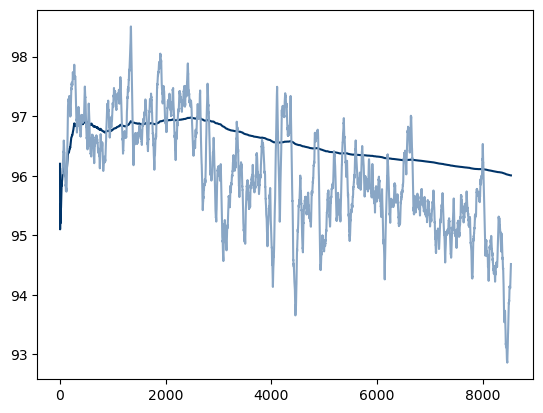

In [211]:
plt.plot(df.xaxis, df.expanding_velo, c = '#003469')
plt.plot(df.xaxis, df.running_velo, c= '#89a6c5')
plt.show()

In [212]:
df = pps[pps.pitch_type.isin(['FF','SI'])]
pps.groupby('pitch_type'
            ,as_index=False).agg({'des' : 'count'
                                  ,'release_speed' : 'mean'
                                 }).sort_values(by='release_speed'
                                                ,ascending=False).round(2)

,pitch_type,des,release_speed
5,FF,73658,93.54
11,SI,49693,93.17
4,FC,11759,89.58
10,PO,28,86.70
6,FS,6627,86.52
12,SL,30737,84.97
0,CH,23958,84.41
13,ST,3428,83.78
9,KN,2,79.75
8,KC,12085,79.41


In [213]:
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
0,FF,2015-10-04,91.2,-1.36,5.90,"Buchanan, David",425772,571527,strikeout,swinging_strike,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
1,FF,2015-10-04,90.8,-1.26,6.00,"Buchanan, David",425772,571527,NaN,swinging_strike,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
3,FF,2015-10-04,88.9,-1.47,6.00,"Buchanan, David",425772,571527,NaN,ball,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
5,FF,2015-10-04,91.0,-1.27,6.11,"Buchanan, David",425772,571527,NaN,called_strike,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
13,SI,2015-10-04,89.8,-1.47,6.01,"Buchanan, David",542513,571527,NaN,ball,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227190,FF,2024-03-29,94.5,-2.31,5.32,"Wheeler, Zack",645277,554430,field_out,hit_into_play,...,0.720,0.882,1.254,1.590,2.050,0.2,-0.405,0.117,9.683,3.166
227191,SI,2024-03-29,95.8,-2.85,6.10,"Hoffman, Jeff",660670,656546,NaN,ball,...,0.720,0.882,1.254,1.590,2.050,0.2,-0.405,0.117,9.683,3.166
227192,SI,2024-03-29,92.8,3.62,5.50,"Strahm, Matt",671739,621381,single,hit_into_play,...,0.720,0.882,1.254,1.590,2.050,0.2,-0.405,0.117,9.683,3.166
227193,SI,2024-03-29,95.8,-2.26,5.29,"Wheeler, Zack",660670,554430,single,hit_into_play,...,0.720,0.882,1.254,1.590,2.050,0.2,-0.405,0.117,9.683,3.166


In [214]:
df['rmu'] = df.groupby(['player_name'])['release_speed'].rolling(window=50).mean().reset_index(0, drop = True)
df[['player_name','release_speed','rmu'
    #,'game_date','game_pk'
   ]]

,player_name,release_speed,rmu
0,"Buchanan, David",91.2,NaN
1,"Buchanan, David",90.8,NaN
3,"Buchanan, David",88.9,NaN
5,"Buchanan, David",91.0,NaN
13,"Buchanan, David",89.8,NaN
...,...,...,...
227190,"Wheeler, Zack",94.5,94.488
227191,"Hoffman, Jeff",95.8,95.690
227192,"Strahm, Matt",92.8,92.572
227193,"Wheeler, Zack",95.8,94.518


In [215]:
df = fp = fastest_pitch_by_pitcher = pp24.groupby(['player_name'
                                                   ,'pitcher'
                                                  ],as_index=False
            ).agg({'release_speed' : 'max'}
                 ).sort_values(by='release_speed',ascending=False)
df.reset_index(drop=True).head(10)

,player_name,pitcher,release_speed
0,"Alvarado, José",621237,101.0
1,"Soto, Gregory",642397,100.8
2,"Estévez, Carlos",608032,100.3
3,"Domínguez, Seranthony",622554,99.9
4,"Kerkering, Orion",689147,99.7
5,"Wheeler, Zack",554430,99.0
6,"Marte, Yunior",628708,98.9
7,"Hoffman, Jeff",656546,98.7
8,"Ruiz, José",614179,98.4
9,"Sánchez, Cristopher",650911,98.3


In [216]:
z = pp24.merge(df, on = ['player_name','pitcher','release_speed'])
#z['count_ab'] = z.balls.astype('str'),'-',z.strikes.astype('str')
z[['player_name'
   ,'pitch_type'
   ,'release_speed'
   ,'game_date'
   ,'inning'
   ,'at_bat_number'
   ,'outs_when_up'
   ,'balls'
   ,'strikes'
   #,'count_ab'
  ]
]

,player_name,pitch_type,release_speed,game_date,inning,at_bat_number,outs_when_up,balls,strikes
0,"Estévez, Carlos",FF,100.3,2024-10-09,6,53,1,0,0
1,"Wheeler, Zack",FF,99.0,2024-10-05,1,3,2,0,1
2,"Walker, Taijuan",SI,93.9,2024-09-19,4,35,0,1,0
3,"Lazar, Max",FF,95.5,2024-09-13,6,44,2,1,2
4,"Gilbert, Tyler",FF,94.7,2024-09-13,8,60,2,0,1
5,"Clemens, Kody",EP,60.6,2024-09-13,9,66,2,1,2
6,"Johnson, Seth",FF,96.6,2024-09-08,1,6,0,0,2
7,"Nelson, Nick",FF,95.6,2024-09-06,9,85,1,1,2
8,"Nelson, Nick",FF,95.6,2024-09-06,9,85,1,0,1
9,"Wilson, Weston",FA,50.6,2024-08-28,9,71,0,1,0


In [217]:
df = mu_fp = mu_fastest_pitch_by_pitcher = pp24.groupby(['player_name'
                                                   ,'pitcher'
                                                  ],as_index=False
            ).agg({'release_speed' : 'mean'}
                 ).sort_values(by='release_speed',ascending=False)
df.reset_index(drop=True).head(10).round(1)

,player_name,pitcher,release_speed
0,"Alvarado, José",621237,95.7
1,"Estévez, Carlos",608032,94.5
2,"Domínguez, Seranthony",622554,93.9
3,"Soto, Gregory",642397,92.4
4,"Hoffman, Jeff",656546,91.9
5,"Ruiz, José",614179,91.7
6,"Wheeler, Zack",554430,91.5
7,"Marte, Yunior",628708,91.4
8,"Kerkering, Orion",689147,91.0
9,"Nelson, Nick",656793,90.8


In [218]:
pp24.merge(df, on = ['player_name','pitcher','release_speed'])

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP


# 2. Nola Sinkers

In [220]:
df = an = pps[pps.player_name == 'Nola, Aaron']

In [221]:
df = ansi = an[an.pitch_type == 'SI']
res = results('stand')
res['group'] = df.pitch_type.unique()[0]
res

,stand,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,group
0,L,2327,705,471,152,23,67,161,0.241,0.315,0.406,0.721,0.313,SI
1,R,2850,784,593,218,15,34,148,0.297,0.332,0.403,0.734,0.319,SI


In [222]:
df = an24 = pp24[pp24.player_name == 'Nola, Aaron']

In [223]:
res

,stand,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,group
0,L,2327,705,471,152,23,67,161,0.241,0.315,0.406,0.721,0.313,SI
1,R,2850,784,593,218,15,34,148,0.297,0.332,0.403,0.734,0.319,SI


In [224]:
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2024,3275,844,582,194,32,52,204,0.247,0.295,0.424,0.719,0.311


In [225]:
pitch_mix(ansi)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
0,SI,Sinker,5177,91.558335,2123.154591,8.67993,100.0


In [226]:
df = ansi
res = results('game_year')
pms = pd.DataFrame()
#for gy in df.game_year.unique().tolist():
#    
res

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2015,354,113,92,25,4,11,8,0.250,0.327,0.420,0.747,0.327
1,2016,848,228,175,67,6,12,39,0.318,0.355,0.450,0.806,0.346
2,2017,564,162,124,47,4,13,25,0.315,0.370,0.497,0.867,0.370
3,2018,413,112,76,18,1,13,23,0.182,0.277,0.242,0.519,0.242
4,2019,359,113,75,30,3,8,28,0.291,0.345,0.408,0.753,0.324
5,2020,248,58,40,14,1,6,11,0.280,0.362,0.380,0.742,0.329
6,2021,420,114,69,25,2,7,36,0.240,0.298,0.356,0.654,0.286
7,2022,642,208,134,38,4,12,59,0.197,0.250,0.301,0.551,0.246
8,2023,653,188,137,49,6,11,39,0.283,0.324,0.434,0.758,0.326
9,2024,676,193,142,57,7,8,41,0.311,0.342,0.470,0.812,0.351


In [227]:
df.groupby('type',as_index=False).agg({'des' : 'count'})
dps = df[(df.type == 'S') & (df.events.isin(['strikeout']))]
dps[['game_year'
     ,'release_speed'
     ,'release_spin_rate'
     ,'pfx_x'
     ,'pfx_z'
     ,'game_date'
     ,'inning'
     ,'outs_when_up'
     ,'events'
    ]]

,game_year,release_speed,release_spin_rate,pfx_x,pfx_z,game_date,inning,outs_when_up,events
1098,2015,92.1,1956.0,-1.61,-0.03,2015-09-26,2,2,strikeout
1806,2015,92.4,1945.0,-1.03,0.57,2015-09-20,3,1,strikeout
2403,2015,91.1,1993.0,-1.73,0.33,2015-09-14,5,1,strikeout
2442,2015,91.0,1862.0,-1.47,0.88,2015-09-14,2,1,strikeout
3353,2015,91.8,1858.0,-0.96,0.56,2015-09-08,7,2,strikeout
...,...,...,...,...,...,...,...,...,...
223934,2024,89.8,2277.0,-1.27,0.93,2024-04-21,8,0,strikeout
223992,2024,90.3,2307.0,-1.51,1.00,2024-04-21,2,0,strikeout
224636,2024,92.7,2350.0,-1.45,0.76,2024-04-15,5,1,strikeout
226158,2024,91.9,2134.0,-1.31,0.76,2024-04-05,2,2,strikeout


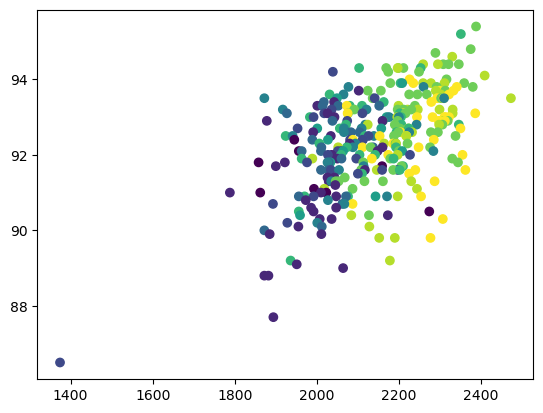

In [228]:
z = dps.groupby('game_year',as_index=False).agg({'inning' : 'count'
                                                ,'release_speed' : 'mean'
                                                ,'release_spin_rate' : 'mean'
                                                })
#y = dps.groupby('game_year',as_index=False).agg({'release_speed' : 'mean'})

# Attempt one, the number of strikeouts on the X axis to explain the average release speed. Weird graph, Kellen.
#x = z.inning
#y = z.release_speed

# Attempt 2 - a scatterplot of the spin rate and release_speed at the pitch level. Colored by game_year.
# I notice an extreme negative outlier, let's investigate.
z = dps.groupby(['game_year','game_date','at_bat_number'],as_index=False).agg({'release_speed' : 'mean'
                                                              ,'release_spin_rate' : 'mean'
                                                              }).sort_values(by='release_speed',ascending=False)

x = z.release_spin_rate
y = z.release_speed

color = z.game_year
plt.scatter(x,y,c = color)
plt.show()

**Outlier Investigation**

In [230]:
outlier = z[z.release_spin_rate == z.release_spin_rate.min()]
df[(df.game_date == outlier.game_date.unique()[0])
&(df.at_bat_number == outlier.at_bat_number.unique()[0])
&(df.events == 'strikeout') # this one I can add since I know the context of my outlier dataset. 
][['game_date'
  ,'home_team'
  ,'batter'
   ,'away_team'
  ,'inning'
   ,'outs_when_up'
   ,'balls'
   ,'strikes'
  ,'pitch_type'
  ,'release_speed'
  ,'release_spin_rate'
  ,'zone'
  ]]

,game_date,home_team,batter,away_team,inning,outs_when_up,balls,strikes,pitch_type,release_speed,release_spin_rate,zone
59053,2017-07-08,PHI,517369,SD,1,1,0,2,SI,86.5,1374.0,13.0


In [231]:
z.release_spin_rate.mean(), z.release_spin_rate.std()

(2137.1294498381876, 135.4412320682917)

(array([ 1.,  0.,  0.,  1., 13., 54., 88., 87., 59.,  6.]),
 array([1374. , 1483.9, 1593.8, 1703.7, 1813.6, 1923.5, 2033.4, 2143.3,
        2253.2, 2363.1, 2473. ]),
 <BarContainer object of 10 artists>)

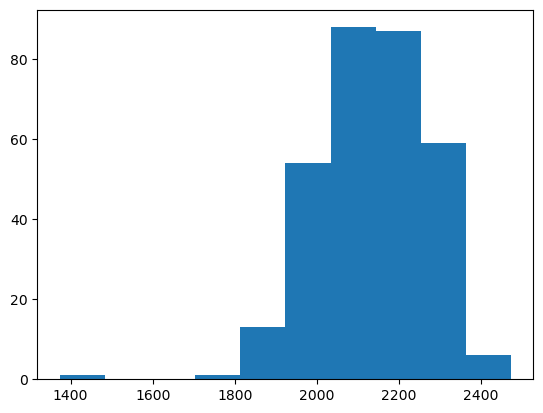

In [232]:
plt.hist(z.release_spin_rate)

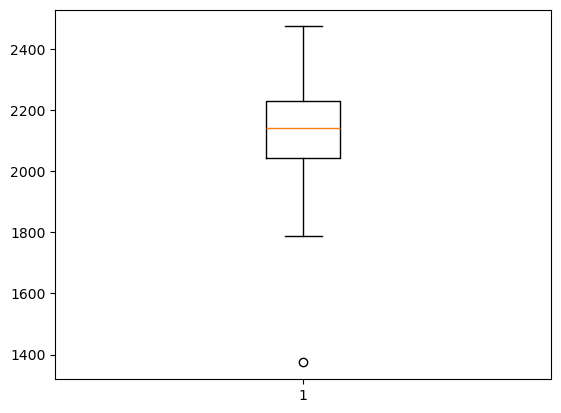

In [233]:
## Attempt at Identifying my outlier, right there boom. It is a low outlier and should be excluded from my dataset
plt.boxplot(z.release_spin_rate)
plt.show()

In [234]:
dp = dps[dps.release_spin_rate > dps.release_spin_rate.min()]
len(dp), len(dps)

(308, 309)

In [235]:
df = dp.groupby(['game_year'],as_index=False).agg({'release_spin_rate' : ['count','mean','std','median']
                                              ,'release_speed' : ['mean','std','median']
                                              ,'zone' : 'mean'
                                             }).round(1)
df.columns = ['_'.join(col).strip('_') for col in df.columns]
df

,game_year,release_spin_rate_count,release_spin_rate_mean,release_spin_rate_std,release_spin_rate_median,release_speed_mean,release_speed_std,release_speed_median,zone_mean
0,2015,8,2008.8,143.7,1974.5,91.4,0.6,91.4,6.6
1,2016,39,2010.4,87.4,2026.0,91.2,1.4,91.3,8.2
2,2017,24,2059.2,81.8,2055.0,92.2,0.9,92.1,6.6
3,2018,23,2030.8,65.6,2028.0,92.1,1.0,92.2,6.6
4,2019,28,2102.4,106.4,2091.0,92.4,1.0,92.6,6.6
5,2020,11,2092.6,87.3,2064.0,92.3,1.0,92.4,8.2
6,2021,36,2121.2,107.3,2113.5,92.5,1.1,92.6,7.2
7,2022,59,2221.2,89.7,2211.0,93.0,1.1,93.1,6.1
8,2023,39,2225.3,98.2,2223.0,92.5,1.4,92.8,7.3
9,2024,41,2251.4,84.1,2279.0,92.6,1.0,92.9,7.2


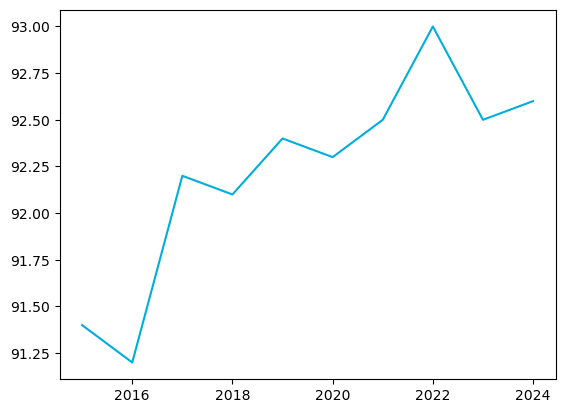

In [236]:
z = df
x = z.game_year
y = z.release_speed_mean
color = z.game_year.values
color = '#00addc'
plt.plot(x,y, c = color)
plt.show()

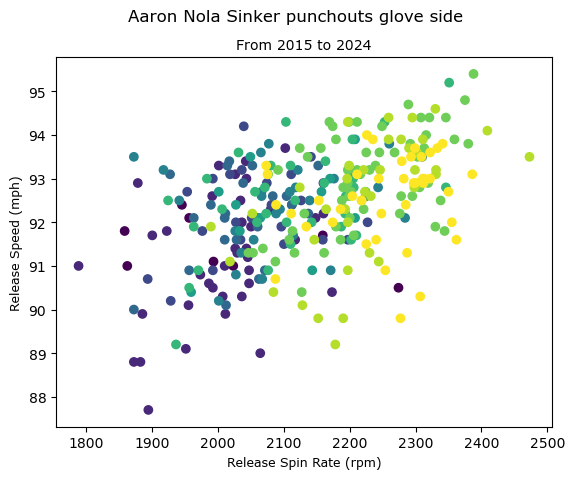

In [237]:
color = dp.game_year
plt.scatter(dp.release_spin_rate,dp.release_speed, c = color)
#plt.legend()
plt.suptitle('Aaron Nola Sinker punchouts glove side',fontsize = 12, font = 'verdana')
plt.title('From 2015 to 2024',fontsize=10, font = 'verdana')
plt.xlabel('Release Spin Rate (rpm)',font = 'verdana', fontsize = 9)
plt.ylabel('Release Speed (mph)',font = 'verdana', fontsize = 9)
plt.show()

## From ChatGPT
Not sure I am such a fan, it added a color bar. These are being treated like numerical values but they are really categorical.

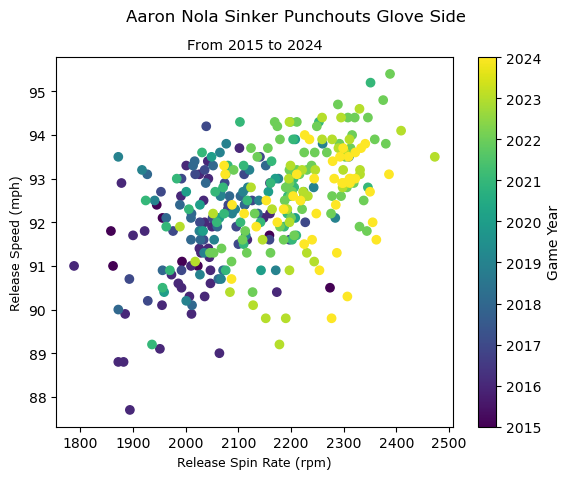

In [239]:
# import matplotlib.pyplot as plt

# Assuming dp is your DataFrame
color = dp.game_year

# Scatter plot
plt.scatter(dp.release_spin_rate, dp.release_speed, c=color, cmap='viridis')  # Use a colormap
plt.colorbar(label='Game Year')  # Add colorbar to show the game_year scale

# Titles and labels
plt.suptitle('Aaron Nola Sinker Punchouts Glove Side', fontsize=12, font='Verdana')
plt.title('From 2015 to 2024', fontsize=10, font='Verdana')
plt.xlabel('Release Spin Rate (rpm)', font='Verdana', fontsize=9)
plt.ylabel('Release Speed (mph)', font='Verdana', fontsize=9)

# Show the plot
plt.show()

## Second Prompt to ChatGPT

### KS Prompt
"color a scatterplot based on a categorical variable in matplotlib"
<br> The machine suggests a better way to do it, using seaborn.
<br> But the seaborn code doesn't work lololololol.

In [242]:
df = dp

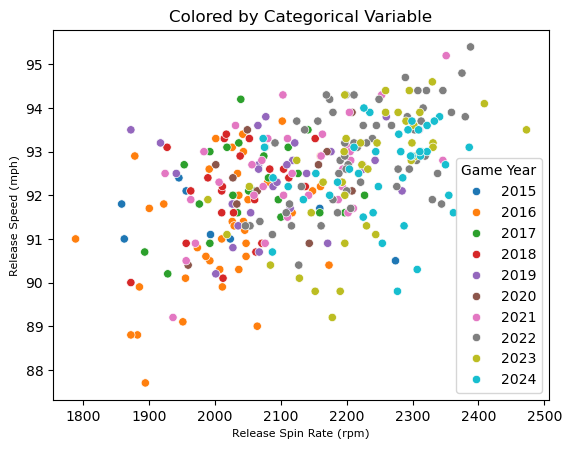

In [243]:
sns.scatterplot(data=df, x='release_spin_rate', y='release_speed', hue='game_year', palette='tab10')
plt.title('Colored by Categorical Variable')
plt.xlabel('Release Spin Rate (rpm)',font='verdana',fontsize=8)
plt.ylabel('Release Speed (mph)',font='verdana',fontsize=8)
plt.legend(title='Game Year',loc=0)
plt.show()


I opened up all the Aaron Nola backdoor backwards Ks to RHBs in 2024 through Statcast Search.

# 3. Strahm L v R Splits

In [246]:
ms = pps[pps.player_name == 'Strahm, Matt']
len(ms)

2485

In [247]:
df = ms
res = results('game_year')
lpm = lhb_pitch_mix(df)
rpm = rhb_pitch_mix(df)
res

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2023,1459,371,232,71,11,23,113,0.209,0.261,0.363,0.624,0.270
1,2024,1026,245,150,40,5,10,79,0.178,0.229,0.298,0.526,0.232


In [248]:
ms24 = ms[ms.game_year == 2024]
df = ms24
res = results('game_year')
lpm = lhb_pitch_mix(df)
rpm = rhb_pitch_mix(df)
lpm

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
1,FF,4-Seam Fastball,137,93.436496,2529.604478,7.313869,46.4
3,SL,Slider,85,81.812941,2720.395062,9.247059,28.8
2,SI,Sinker,71,93.266197,2429.869565,6.830986,24.1
0,FC,Cutter,2,89.950000,2585.500000,9.000000,0.7


In [249]:
rpm

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
1,FF,4-Seam Fastball,414,93.345652,2487.789082,7.782609,56.6
0,FC,Cutter,124,88.330645,2537.916667,8.274194,17.0
3,SL,Slider,117,81.396581,2707.144144,9.367521,16.0
2,SI,Sinker,76,93.453947,2416.026667,7.473684,10.4


In [250]:
df = ms[ms.stand == 'R']
res_rhb = results('game_year')
res_rhb['stand'] = 'R'

df = ms[ms.stand == 'L']
res_lhb = results('game_year')
res_lhb['stand'] = 'L'

In [251]:
res_rhb

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,stand
0,2023,1082,267,165,52,9,21,80,0.216,0.277,0.390,0.667,0.287,R
1,2024,731,165,95,22,3,9,58,0.148,0.206,0.275,0.481,0.212,R


In [252]:
res_lhb

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,stand
0,2023,377,104,67,19,2,2,33,0.194,0.221,0.296,0.517,0.224,L
1,2024,295,80,55,18,2,1,21,0.237,0.275,0.342,0.617,0.273,L


In [253]:
df = msnp = nphl[nphl.player_name == 'Strahm, Matt']

In [254]:
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2016,433,89,46,13,0.0,10.0,30,0.171,0.270,0.197,0.467,0.222
1,2017,647,152,92,30,6.0,20.0,37,0.236,0.349,0.417,0.766,0.334
2,2018,998,245,152,39,6.0,20.0,69,0.177,0.253,0.305,0.558,0.248
3,2019,1789,483,340,121,22.0,18.0,118,0.267,0.302,0.477,0.779,0.324
4,2020,370,99,71,21,3.0,5.0,17,0.239,0.313,0.386,0.699,0.307
5,2021,136,35,31,15,0.0,0.0,4,0.441,0.429,0.588,1.017,0.429
6,2022,764,193,119,38,5.0,16.0,52,0.222,0.306,0.351,0.657,0.294


In [255]:
df = msnp[msnp.stand == 'R']
res_rhbnp = results('game_year')
res_rhbnp['stand'] = 'R'

df = msnp[msnp.stand == 'L']
res_lhbnp = results('game_year')
res_lhbnp['stand'] = 'L'

In [256]:
res_rhbs = pd.concat([res_rhb,res_rhbnp])
res_rhbs

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,stand
0,2023,1082,267,165,52,9.0,21.0,80,0.216,0.277,0.390,0.667,0.287,R
1,2024,731,165,95,22,3.0,9.0,58,0.148,0.206,0.275,0.481,0.212,R
0,2016,318,63,28,6,0.0,9.0,23,0.115,0.254,0.135,0.389,0.200,R
1,2017,470,113,73,23,5.0,13.0,25,0.237,0.336,0.443,0.780,0.336,R
2,2018,658,168,106,23,3.0,11.0,49,0.149,0.214,0.253,0.468,0.210,R
3,2019,1298,348,247,87,17.0,10.0,87,0.264,0.290,0.483,0.774,0.319,R
4,2020,177,45,31,12,1.0,3.0,7,0.316,0.422,0.474,0.896,0.395,R
5,2021,91,19,16,8,0.0,0.0,3,0.421,0.421,0.632,1.053,0.447,R
6,2022,544,136,83,27,4.0,12.0,39,0.220,0.294,0.350,0.644,0.288,R


In [257]:
res_lhbs = pd.concat([res_lhb,res_lhbnp])
res_lhbs

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,stand
0,2023,377,104,67,19,2.0,2.0,33,0.194,0.221,0.296,0.517,0.224,L
1,2024,295,80,55,18,2.0,1.0,21,0.237,0.275,0.342,0.617,0.273,L
0,2016,115,26,18,7,0.0,1.0,7,0.292,0.308,0.333,0.641,0.277,L
1,2017,177,39,19,7,1.0,7.0,12,0.233,0.385,0.333,0.718,0.329,L
2,2018,340,77,46,16,3.0,9.0,20,0.242,0.338,0.424,0.762,0.332,L
3,2019,491,135,93,34,5.0,8.0,31,0.274,0.333,0.460,0.793,0.336,L
4,2020,193,54,40,9,2.0,2.0,10,0.180,0.222,0.320,0.542,0.234,L
5,2021,45,16,15,7,0.0,0.0,1,0.467,0.438,0.533,0.971,0.407,L
6,2022,220,57,36,11,1.0,4.0,13,0.229,0.333,0.354,0.688,0.310,L


In [258]:
z = pd.concat([res_rhbs,res_lhbs])
x = z.game_year
y = z.ops
color = z.stand
custom_palette = {'L' : '#FF0000'
                  ,'R' : '#003469'
                 }

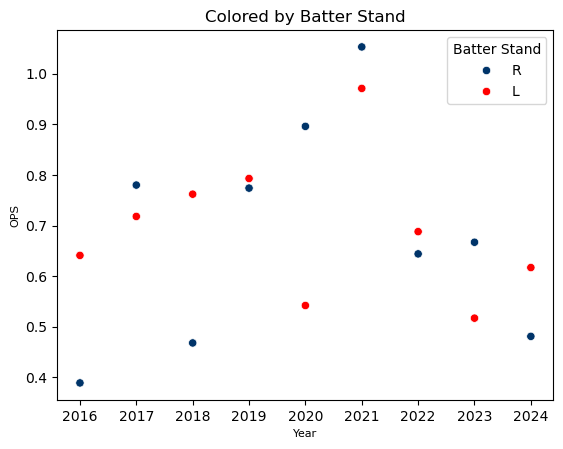

In [259]:
sns.scatterplot(data=z, x='game_year', y='ops', hue='stand', palette=custom_palette)
plt.title('Colored by Batter Stand')
plt.xlabel('Year',font='verdana',fontsize=8)
plt.ylabel('OPS',font='verdana',fontsize=8)
plt.legend(title='Batter Stand',loc=0)
plt.show()

# 4. Hoffman in the Playoffs

In [261]:
jhpp = pps[pps.player_name == 'Hoffman, Jeff']
jh = pd.concat([jhpp, nphl[nphl.player_name == 'Hoffman, Jeff']])
df = jh
res = results('game_year')

In [262]:
res

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2016,556,147,108,37,7.0,16,22,0.287,0.361,0.512,0.872,0.370
1,2017,1610,439,314,106,15.0,39,82,0.273,0.339,0.490,0.829,0.349
2,2018,181,43,32,15,0.0,6,5,0.405,0.488,0.486,0.975,0.428
3,2019,1256,312,209,77,21.0,31,68,0.283,0.359,0.588,0.947,0.387
4,2020,399,103,73,32,3.0,8,20,0.352,0.408,0.571,0.979,0.412
5,2021,1360,333,206,70,12.0,43,79,0.248,0.354,0.436,0.791,0.344
6,2022,848,197,126,40,5.0,22,45,0.234,0.330,0.404,0.733,0.324
7,2023,972,235,134,34,4.0,19,78,0.163,0.238,0.263,0.501,0.226
8,2024,1045,275,163,51,6.0,17,90,0.202,0.262,0.325,0.587,0.259


In [263]:
jhpp.groupby('game_type',as_index=False).agg({'des' : 'count'})

,game_type,des
0,D,66
1,F,4
2,L,77
3,R,1870


In [264]:
df = jhpp
res = results('game_type')
res

,game_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,D,66,15,8,4.0,1.0,3.0,2.0,0.400,0.600,0.700,1.300,0.545
1,F,4,1,1,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
2,L,77,21,13,4.0,0.0,0.0,8.0,0.190,0.190,0.190,0.381,0.168
3,R,1870,473,275,77.0,9.0,33.0,158.0,0.179,0.243,0.294,0.537,0.238


In [265]:
df['game_category'] = df['game_type'].apply(lambda x: 'R' if x == 'R' else 'P')
results('game_category')

,game_category,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,P,147,37,22,8,1,3,10,0.250,0.351,0.344,0.695,0.316
1,R,1870,473,275,77,9,33,158,0.179,0.243,0.294,0.537,0.238


# 5. Phillies Offense Regular vs Playoffs

In [267]:
pos['game_category'] = pos['game_type'].apply(lambda x: 'R' if x == 'R' else 'P')
df = pos
trpos = team_res_pos = results('game_category')
gcs = pd.DataFrame()
for p in pos[pos.game_type != 'R'].player_name.unique().tolist():
    df = pos[pos.player_name == p]
    res = results('game_category')
    res['player'] = p
    gcs = pd.concat([gcs, res])
    print(p)

Harper, Bryce
Realmuto, J.T.
Hoskins, Rhys
Schwarber, Kyle
Sosa, Edmundo
Vierling, Matt
Segura, Jean
Bohm, Alec
Castellanos, Nick
Marsh, Brandon
Stott, Bryson
Maton, Nick
Rojas, Johan
Turner, Trea
Cave, Jake
Pache, Cristian
Wilson, Weston
Clemens, Kody
Hays, Austin


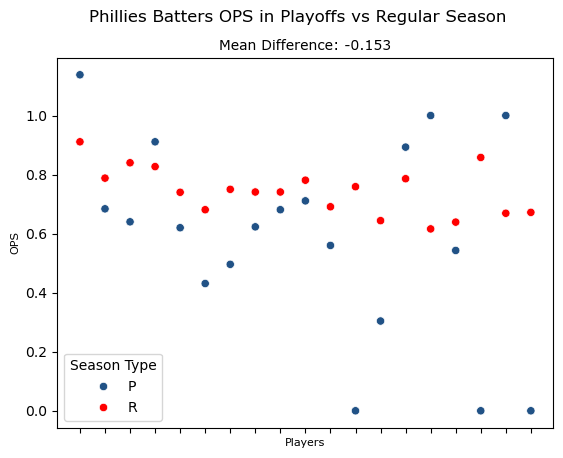

In [268]:
z = gcs
custom_palette = {'R' : '#FF0000'
                  ,'P' : '#215286'
                 }
zp = z[z.game_category == 'P']
zr = z[z.game_category == 'R']
df = zp.merge(zr, on = ['player'], suffixes = ('_p','_r'))
df['diff'] = df.ops_p - df.ops_r
mu_diff = round(df['diff'].mean(),3)
sns.scatterplot(data=z,x='player',y='ops',hue = 'game_category',palette = custom_palette)
plt.legend(title='Season Type', loc = 0)
plt.suptitle('Phillies Batters OPS in Playoffs vs Regular Season',font='verdana',fontsize = 12)
plt.title('Mean Difference: {}'.format(mu_diff),font='verdana',fontsize = 10)
plt.xlabel('Players',font = 'verdana',fontsize = 8)
plt.ylabel('OPS', font = 'verdana', fontsize = 8)
#plt.vlines(z.player,
plt.xticks(visible=False)
plt.show()

# 6. Phillies Defense Regular vs Playoffs

In [270]:
pps['game_category'] = pps['game_type'].apply(lambda x: 'R' if x == 'R' else 'P')
df = pps
trpps = team_res_pps = results('game_category')
gcsp = pd.DataFrame()
for p in pps[pps.game_type != 'R'].player_name.unique().tolist():
    df = pps[pps.player_name == p]
    res = results('game_category')
    res['player'] = p
    gcsp = pd.concat([gcsp, res])
    print(p)

Wheeler, Zack
Alvarado, José
Eflin, Zach
Robertson, David
Domínguez, Seranthony
Syndergaard, Noah
Brogdon, Connor
Nola, Aaron
Hand, Brad
Bellatti, Andrew
Suárez, Ranger
Nelson, Nick
Gibson, Kyle
Falter, Bailey
Hoffman, Jeff
Strahm, Matt
Kimbrel, Craig
Kerkering, Orion
Lorenzen, Michael
Soto, Gregory
Sánchez, Cristopher
Estévez, Carlos
Ruiz, José
Banks, Tanner


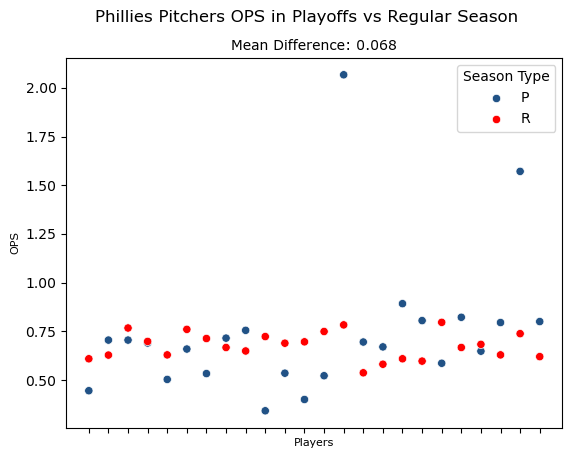

In [271]:
z = gcsp
custom_palette = {'R' : '#FF0000'
                  ,'P' : '#215286'
                 }
zp = z[z.game_category == 'P']
zr = z[z.game_category == 'R']
df = zp.merge(zr, on = ['player'], suffixes = ('_p','_r'))
df['diff'] = df.ops_p - df.ops_r
mu_diff = round(df['diff'].mean(),3)
sns.scatterplot(data=z,x='player',y='ops',hue = 'game_category',palette = custom_palette)
plt.legend(title='Season Type', loc = 0)
plt.suptitle('Phillies Pitchers OPS in Playoffs vs Regular Season',font='verdana',fontsize = 12)
plt.title('Mean Difference: {}'.format(mu_diff),font='verdana',fontsize = 10)
plt.xlabel('Players',font = 'verdana',fontsize = 8)
plt.ylabel('OPS', font = 'verdana', fontsize = 8)
#plt.vlines(z.player,
plt.xticks(visible=False)
plt.show()

# 7. Jonathan India

In [273]:
cin = pos[(pos.away_team == 'CIN')&(pos.game_year >= 2021)]
cin.groupby('fielder_4',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,fielder_4,des
0,663697,1574
3,669289,158
1,664670,127
2,669222,23


In [274]:
india = 663697
ji = pps[pps.batter == india]
df = ji
results('home_team')
# I have been in attendance for both of Jonathan India's home runs in his career against the Phillies
#ji[ji.description.str.contains('Jonathan India')]

,home_team,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,CIN,142,38,27,9,1,1,8,0.265,0.289,0.441,0.731,0.306
1,PHI,250,52,30,8,1,7,14,0.182,0.308,0.341,0.649,0.292


# 8. 2022 World Series

In [276]:
wspos = pos[pos.game_type == 'W']
wspps = pps[pps.game_type == 'W']
df = wspos
wsreso = results('game_type')
df = wspps
wsresp = results('game_type')
wsresp

,game_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,W,838,220,144,48,5,15,57,0.24,0.305,0.365,0.67,0.297


In [277]:
wsreso

,game_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,W,888,216,120,31,8,22,71,0.163,0.259,0.321,0.58,0.262


# 9. Alec Bohm defense behind Aaron Nola and Zack Wheeler

In [279]:
bohm = 664761 # I hade Maikel Franco's in here
pps.groupby('fielder_5',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(10)

,fielder_5,des
20,596748,84359
34,664761,71270
26,624641,13384
1,433217,7792
21,605125,7206
33,664068,6294
16,591720,5896
10,516416,3028
27,641487,3000
11,520471,2610


In [280]:
df = pps[(pps.fielder_5 == bohm)
&(pps.hit_location == 5)
&(pps.player_name.isin(['Wheeler, Zack', 'Nola, Aaron']))
]
res = results('player_name')
res.sort_values(by='pitches',ascending=False).head(5)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Nola, Aaron",200,200,200,13,0.0,0.0,0.0,0.065,0.065,0.070,0.135,0.059
1,"Wheeler, Zack",171,171,171,17,0.0,0.0,0.0,0.099,0.099,0.099,0.199,0.088


In [281]:
df = pps[(pps.fielder_5 == bohm)
&(pps.hit_location == 5)
#&(pps.player_name.isin(['Wheeler, Zack', 'Nola, Aaron']))
]
res = results('player_name')
res.sort_values(by='pitches',ascending=False).head(5)

evs = df.groupby('player_name',as_index=False).agg({'des' : 'count'
                                              ,'launch_speed' : 'mean'
                                              ,'launch_angle' : 'mean'
                                              ,'hit_distance_sc' : 'mean'
                                              }).sort_values(by='des',ascending=False).round(1).reset_index(drop=True
                                                                                                           ).head(30
                                                                                                     )

z = evs.merge(res, on = 'player_name')[['player_name'
                                    ,'pitches'
                                    ,'launch_speed'
                                    ,'launch_angle'
                                    ,'hit_distance_sc'
                                    ,'ba'
                                    ,'hits'
                                   ]]

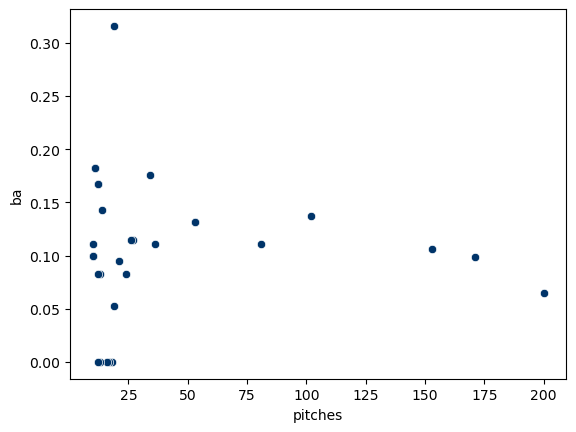

In [282]:
sns.scatterplot(data = z, x = 'pitches'
                ,y = 'ba'
                ,color = '#003469'
                #,hue = 'launch_speed'
                #,palette = 'tab10'
               )
#plt.legend.remove()
plt.show()

# 10. Big swings in winning probability

In [284]:
pos['wpa'] = pos['delta_home_win_exp']**2
pos[['game_date'
     ,'player_name'
     #,'batter'
     ,'home_team'
     ,'away_team'
     ,'inning'
     ,'outs_when_up'
     ,'events'
     ,'home_score'
     ,'post_home_score'
     ,'away_score'
     ,'post_away_score'
     ,'delta_home_win_exp'
     ,'wpa']].sort_values(by='wpa',ascending=False).head(10).round(3)

,game_date,player_name,home_team,away_team,inning,outs_when_up,events,home_score,post_home_score,away_score,post_away_score,delta_home_win_exp,wpa
142881,2021-06-09,"Williams, Luke",PHI,ATL,9,2,home_run,0,2,1,1,0.904,0.817
166178,2022-06-15,"Stubbs, Garrett",PHI,MIA,9,2,home_run,0,3,1,1,0.831,0.691
83709,2018-06-18,"Altherr, Aaron",PHI,STL,10,2,double,4,6,5,5,0.831,0.691
167676,2022-06-05,"Stott, Bryson",PHI,LAA,9,2,home_run,6,9,7,7,0.831,0.691
129519,2021-09-21,"Realmuto, J.T.",PHI,BAL,10,2,triple,1,3,2,2,0.805,0.648
137127,2021-07-26,"McCutchen, Andrew",PHI,WSH,9,1,home_run,3,6,5,5,0.799,0.638
122231,2020-09-08,"Bohm, Alec",PHI,BOS,7,2,single,4,6,5,5,0.765,0.585
169613,2022-05-22,"Bohm, Alec",PHI,LAD,10,2,field_error,2,4,3,3,0.765,0.585
67147,2017-04-22,"Franco, Maikel",PHI,ATL,10,2,single,2,4,3,3,0.729,0.531
189268,2023-07-07,"Pache, Cristian",MIA,PHI,9,2,home_run,3,3,2,4,-0.702,0.493


In [285]:
po24['wpa'] = po24['delta_home_win_exp']**2
po24[['game_date','player_name','batter','home_team','away_team'
     ,'inning'
     ,'outs_when_up'
     ,'events'
     ,'home_score'
     ,'post_home_score'
     ,'wpa']].sort_values(by='wpa',ascending=False) # The Edmundo triple

,game_date,player_name,batter,home_team,away_team,inning,outs_when_up,events,home_score,post_home_score,wpa
218863,2024-06-09,"Castellanos, Nick",592206,PHI,NYM,9,1,grounded_into_double_play,5,5,0.280900
220609,2024-05-25,"Sosa, Edmundo",624641,COL,PHI,9,0,triple,3,3,0.252004
221487,2024-05-18,"Clemens, Kody",665019,PHI,WSH,9,2,home_run,2,3,0.239121
208768,2024-08-29,"Castellanos, Nick",592206,PHI,ATL,7,2,home_run,3,5,0.185761
204380,2024-10-06,"Stott, Bryson",681082,PHI,NYM,8,1,triple,3,5,0.184041
...,...,...,...,...,...,...,...,...,...,...,...
213277,2024-07-26,"Schwarber, Kyle",656941,PHI,CLE,3,0,NaN,0,0,0.000000
213276,2024-07-26,"Schwarber, Kyle",656941,PHI,CLE,3,0,NaN,0,0,0.000000
213275,2024-07-26,"Schwarber, Kyle",656941,PHI,CLE,3,0,NaN,0,0,0.000000
213273,2024-07-26,"Turner, Trea",607208,PHI,CLE,3,1,NaN,0,0,0.000000


In [286]:
pps['wpa'] = pps['delta_home_win_exp']**2
outs = pps[~pps.events.isin(['single','double','triple','home_run','walk','field_error'])]
outs[outs.game_year==2024][['game_date'
     ,'player_name'
     #,'batter'
     ,'home_team'
     ,'away_team'
     ,'inning'
     ,'outs_when_up'
     ,'events'
     ,'home_score'
     ,'post_home_score'
     ,'away_score'
     ,'post_away_score'
     ,'delta_home_win_exp'
     ,'wpa']].sort_values(by='wpa',ascending=False).head(40).round(3)

,game_date,player_name,home_team,away_team,inning,outs_when_up,events,home_score,post_home_score,away_score,post_away_score,delta_home_win_exp,wpa
217227,2024-06-14,"Kerkering, Orion",BAL,PHI,10,2,NaN,2,3,3,3,0.364,0.132
213299,2024-07-19,"Alvarado, José",PIT,PHI,9,1,fielders_choice,6,7,7,7,0.280,0.078
222921,2024-04-29,"Domínguez, Seranthony",LAA,PHI,7,2,NaN,4,6,4,4,0.280,0.078
222650,2024-05-01,"Soto, Gregory",LAA,PHI,9,1,strikeout,1,1,2,2,-0.252,0.064
209092,2024-08-21,"Estévez, Carlos",ATL,PHI,9,2,field_out,2,2,3,3,-0.235,0.055
220667,2024-05-16,"Hoffman, Jeff",PHI,NYM,8,2,NaN,3,3,3,4,-0.233,0.054
218287,2024-06-04,"Domínguez, Seranthony",PHI,MIL,10,1,fielders_choice_out,1,1,1,1,0.223,0.050
213337,2024-07-19,"Alvarado, José",PIT,PHI,9,0,NaN,6,6,7,7,0.221,0.049
225497,2024-04-10,"Hoffman, Jeff",STL,PHI,9,1,grounded_into_double_play,3,3,4,4,-0.206,0.042
222632,2024-05-01,"Soto, Gregory",LAA,PHI,9,2,field_out,1,1,2,2,-0.195,0.038


# 11. Trea Turner with RISP

In [288]:
tt = pos[pos.player_name == 'Turner, Trea']
df = ttrisp = tt[(tt.on_2b.isna() != True) | (tt.on_3b.isna() != True)]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2023,651,175,113,37,3,14,47,0.234,0.297,0.354,0.652,0.286
1,2024,417,113,87,28,1,6,19,0.267,0.310,0.324,0.634,0.282


In [289]:
# Trea Turner really only hit one home run with runners in scoring position? I think I might be wrong for this.

# 12. Is RISP indicative of something else?
I am not sure what I meant by this but maybe I will come back to it.

# 13. Backdoor SI for Called Strike Three
Link to video: https://youtu.be/j1aMjdmOcZE?si=KXIlr6IXoduZEMjO

In [292]:
# import subprocess

# # Normalize frame rates for all MP4 files
# folder_path = 'C:\\Users\\Kellen\\Downloads\\Backdoor SI Called Strike 3 PHI RHP 2024\\'
# mp4_files = [file for file in os.listdir(folder_path) if file.endswith(".mp4")]

# for file in mp4_files:
#     input_path = os.path.join(folder_path, file)
#     output_path = os.path.join(folder_path, f"normalized_{file}")
#     command = [
#         "ffmpeg", "-i", input_path, "-r", "30", "-vf", "fps=30", "-c:v", "libx264",
#         "-preset", "fast", "-crf", "23", "-c:a", "aac", output_path
#     ]
#     subprocess.run(command)

# print("All files normalized.")


In [293]:
# from moviepy.editor import VideoFileClip, concatenate_videoclips

# # Step 1: Specify the folder containing MP4 files
# folder_path = 'C:\\Users\\Kellen\\Downloads\\Backdoor SI Called Strike 3 PHI RHP 2024\\'

# # Step 2: Get a sorted list of MP4 files in the folder
# mp4_files = sorted([file for file in os.listdir(folder_path) if file.endswith(".mp4")])

# # Step 3: Load all MP4 files as video clips
# clips = [VideoFileClip(os.path.join(folder_path, file)) for file in mp4_files]

# # Step 4: Concatenate the clips
# final_clip = concatenate_videoclips(clips, method="compose")
# final_clip = final_clip.set_fps(30)

# # Step 5: Write the output file
# output_path = os.path.join(folder_path, "combined.mp4")  # Replace with desired output path
# final_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")

# print(f"Video successfully created: {output_path}")

In [294]:
# this was a test to make sure that I could successfully concatenate two videos

# from moviepy.editor import VideoFileClip, concatenate_videoclips

# # List of MP4 files (provide full paths)
# video_files = ["C:\\Users\\Kellen\\Downloads\\Backdoor SI Called Strike 3 PHI RHP 2024\\QnZ6bzlfWGw0TUFRPT1fQkZSV1ZBQlNVZ1VBV2dOUVVBQUFCRlFEQUZoUUJnSUFBMTBCQlZKUVZRcFZCZ3NG.mp4"
#                , "C:\\Users\\Kellen\\Downloads\\Backdoor SI Called Strike 3 PHI RHP 2024\\MzVENGpfWGw0TUFRPT1fRHdVQVhWVUZBZ1lBV1FOUUJRQUFBQTVVQUFNSEFWZ0FVRlZSQlFzRUNWWlhVd29G.mp4"]

# # Load the video clips
# clips = [VideoFileClip(file) for file in video_files]

# # Concatenate the clips
# final_clip = concatenate_videoclips(clips, method="compose")

# # Write the output video
# final_clip.write_videofile("output.mp4", codec="libx264", audio_codec="aac", preset="ultrafast")


# 14. Orion Kerkering ST Whiffs
Link to video: https://www.youtube.com/watch?v=Fd7iqeZeYWA&t=8s

In [296]:
ok.groupby(['pitch_type','game_year'],as_index=False).agg({'des' : 'count'
                                                           ,'release_speed' : 'mean'
                                                           ,'release_spin_rate' : 'mean'
                                                          }).round(2)

,pitch_type,game_year,des,release_speed,release_spin_rate
0,FF,2024,326,97.57,2354.78
1,SI,2024,182,96.42,2218.84
2,ST,2024,642,86.22,2894.53


In [297]:
df = ok_st_whiffs = ok[(ok.pitch_type == 'ST')
                      &(ok.description.isin(['swinging_strike','swinging_strike_blocked']))
                     ].groupby('player_name',as_index=False).agg({'des' : 'count'})
df

,player_name,des
0,"Kerkering, Orion",78


In [298]:
# folder = 'RHB Whiffs on OK ST 2024'
# # Normalize frame rates for all MP4 files
# folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)
# mp4_files = [file for file in os.listdir(folder_path) if file.endswith(".mp4")]

# for file in mp4_files:
#     input_path = os.path.join(folder_path, file)
#     output_path = os.path.join(folder_path, f"normalized_{file}")
#     command = [
#         "ffmpeg", "-i", input_path, "-r", "30", "-vf", "fps=30", "-c:v", "libx264",
#         "-preset", "fast", "-crf", "23", "-c:a", "aac", output_path
#     ]
#     subprocess.run(command)
#     print('File normalized')

# print("All files normalized.")

# # After running this step, delete out the old files since the new ones get written with normalized in the name, or just get rid of them altogher?


In [299]:
# from moviepy.editor import VideoFileClip, concatenate_videoclips

# # Step 1: Specify the folder containing MP4 files
# folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)

# # Step 2: Get a sorted list of MP4 files in the folder
# mp4_files = sorted([file for file in os.listdir(folder_path) if file.endswith(".mp4")])
# cwd = os.getcwd()
# os.chdir(folder_path)
# mp4_files = glob.glob('*normalized*.mp4')
# os.chdir(cwd)

# # Step 3: Load all MP4 files as video clips
# clips = [VideoFileClip(os.path.join(folder_path, file)) for file in mp4_files]

# # Step 4: Concatenate the clips
# final_clip = concatenate_videoclips(clips, method="compose")
# final_clip = final_clip.set_fps(30)

# # Step 5: Write the output file
# output_path = os.path.join(folder_path, "{}.mp4".format(folder))  # Replace with desired output path
# final_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")

# print(f"Video successfully created: {output_path}")

# 15. Mauricio Llovera Home Runs
By request of Kevin Eckenrode, I should have seen this one coming.
<br> Link to video: https://youtu.be/lPmjTEXVor0
<br> I got a copyright warning for this one

In [301]:
# folder = 'Mauricio Llovera HRs'
# # Normalize frame rates for all MP4 files
# folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)
# mp4_files = [file for file in os.listdir(folder_path) if file.endswith(".mp4")]

# for file in mp4_files:
#     input_path = os.path.join(folder_path, file)
#     output_path = os.path.join(folder_path, f"normalized_{file}")
#     command = [
#         "ffmpeg", "-i", input_path, "-r", "30", "-vf", "fps=30", "-c:v", "libx264",
#         "-preset", "fast", "-crf", "23", "-c:a", "aac", output_path
#     ]
#     subprocess.run(command)
#     print('File normalized')

# print("All files normalized.")

# # After running this step, delete out the old files since the new ones get written with normalized in the name, or just get rid of them altogher?


In [302]:
# from moviepy.editor import VideoFileClip, concatenate_videoclips

# # Step 1: Specify the folder containing MP4 files
# folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)

# # Step 2: Get a sorted list of MP4 files in the folder
# # mp4_files = sorted([file for file in os.listdir(folder_path) if file.endswith(".mp4")])
# cwd = os.getcwd()
# os.chdir(folder_path)
# mp4_files = glob.glob('*normalized*.mp4')
# os.chdir(cwd)

# # Step 3: Load all MP4 files as video clips
# clips = [VideoFileClip(os.path.join(folder_path, file)) for file in mp4_files]

# # Step 4: Concatenate the clips
# final_clip = concatenate_videoclips(clips, method="compose")
# final_clip = final_clip.set_fps(30)

# # Step 5: Write the output file
# output_path = os.path.join(folder_path, "{}.mp4".format(folder))  # Replace with desired output path
# final_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")

# print(f"Video successfully created: {output_path}")

# 16. Aaron Nola Front Hip Sinkers

In [304]:
# folder = 'Aaron Nola Front Hip Sinkers'
# def concat_mp4s_in_folder(folder):
#     # Normalize frame rates for all MP4 files
#     folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)
#     mp4_files = [file for file in os.listdir(folder_path) if file.endswith(".mp4")]
    
#     for file in mp4_files:
#         input_path = os.path.join(folder_path, file)
#         output_path = os.path.join(folder_path, f"normalized_{file}")
#         command = [
#             "ffmpeg", "-i", input_path, "-r", "30", "-vf", "fps=30", "-c:v", "libx264",
#             "-preset", "fast", "-crf", "23", "-c:a", "aac", output_path
#         ]
#         subprocess.run(command)
#         #print('File normalized')
    
#     print("All files normalized.")

#     # Now I am going to concatenate all the normalized videos
#     from moviepy.editor import VideoFileClip, concatenate_videoclips
    
#     # Step 1: Specify the folder containing MP4 files
#     folder_path = 'C:\\Users\\Kellen\\Downloads\\{}\\'.format(folder)
    
#     # Step 2: Get a sorted list of MP4 files in the folder
#     # mp4_files = sorted([file for file in os.listdir(folder_path) if file.endswith(".mp4")])
#     cwd = os.getcwd()
#     os.chdir(folder_path)
#     mp4_files = glob.glob('*normalized*.mp4')
#     os.chdir(cwd)
    
#     # Step 3: Load all MP4 files as video clips
#     clips = [VideoFileClip(os.path.join(folder_path, file)) for file in mp4_files]
    
#     # Step 4: Concatenate the clips
#     final_clip = concatenate_videoclips(clips, method="compose")
#     final_clip = final_clip.set_fps(30)
    
#     # Step 5: Write the output file
#     output_path = os.path.join(folder_path, "{}.mp4".format(folder))  # Replace with desired output path
#     final_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")
    
#     print(f"Video successfully created: {output_path}")

# concat_mp4s_in_folder(folder)

# 17. Hardest Throws by Phillies Defense

In [306]:
# concat_mp4s_in_folder('Hardest Throws by Phillies Defense in 2024')

# 18. Jean Segura Turning Double Plays

In [308]:
concat_mp4s_in_folder('Jean Segura Turning Double Plays')

All files normalized.
Moviepy - Building video C:\Users\Kellen\Downloads\Jean Segura Turning Double Plays\Jean Segura Turning Double Plays.mp4.
MoviePy - Writing audio in Jean Segura Turning Double PlaysTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video C:\Users\Kellen\Downloads\Jean Segura Turning Double Plays\Jean Segura Turning Double Plays.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\Kellen\Downloads\Jean Segura Turning Double Plays\Jean Segura Turning Double Plays.mp4
Video successfully created: C:\Users\Kellen\Downloads\Jean Segura Turning Double Plays\Jean Segura Turning Double Plays.mp4
